# Исследование космических миссий


## 1. Начало исследования

В распоряжении имеется датасет с данными о космических миссиях разных стран в период с 1957 по август 2022 года. Работа проводится в свободном формате для поиска интересных фактов и закономерностей, а также визуализации полученных результатов.<br>
Для начала прочитаем файл `space_missions_data_dictionary`, чтобы понять из чего состоят предоставленные данные и наметить первые шаги для исследования. Cперва подключим основные библиотеки, которыми будем пользоваться во время исследования, затем прочитаем сам файл.

Данные взяты с сайта [Maven analytics](https://www.mavenanalytics.io/data-playground)

In [1]:
# Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

# Игнор ворнингов
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Считывание файла
space_dictionary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Space missions/space_missions_data_dictionary.csv')

# Функция для полного отображения содержимого ячеек
def dspl_full(x):
    # Задаем макс. ширину ячеек
    pd.set_option('display.max_colwidth', 100)
    # Отображение данных
    display(x)
    # Сброс макс. ширину на стандартную
    pd.reset_option('display.max_colwidth')

# Применение функции
dspl_full(space_dictionary)

,Field,Description
0,Company,Company responsible for the space mission
1,Location,Location of the launch
2,Date,Date of the launch
3,Time,Time of the launch (UTC)
4,Rocket,Name of the rocket used for the mission
5,Mission,Name of the space mission (or missions)
6,RocketStatus,Status of the rocket as of August 2022 (Active or Inactive)
7,Price,Cost of the rocket in millions of US dollars
8,MissionStatus,"Status of the mission (Success, Failure, Partial Failure, Prelaunch Failure)"


И того получаем, что данные состоят из 9 колонок:

*   Company - компания, отвечающая за космическую миссию
*   Location - место запуска
*   Date - дата запуска
*   Time - время запуска
*   Rocket - наименование ракеты
*   Mission - наименование миссии
*   RocketStatus - статус ракеты
*   Price - стоимость ракеты
*   MissionStatus - статус миссии

Теперь посмотрим на сам датасет.



In [2]:
# Считывание файла
space = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Space missions/space_missions.csv', encoding='latin-1')

# Функция вывода основных данных по датасету
def all_info(data):
  print('Общая информация')
  data.info()
  print('*'*100, '\nПервые значения')
  display(data.head())
  print('*'*100, '\nДубликаты')
  display(data.duplicated().sum())
  print('*'*100, '\nПропуски')
  display(data.isna().mean().apply('{:.2%}'.format))

# Применение функции
all_info(space)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB
**************************************************************************************************** 
Первые значения


,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


**************************************************************************************************** 
Дубликаты


1

**************************************************************************************************** 
Пропуски


Company           0.00%
Location          0.00%
Date              0.00%
Time              2.74%
Rocket            0.00%
Mission           0.00%
RocketStatus      0.00%
Price            72.68%
MissionStatus     0.00%
dtype: object

**Вывод**

В нашем распоряжении датасет из 9 клонок и 4630 строк, при этом данные во всех колонках имеют тип 'object', как минимум стоит перевести дату и цену в соответствующие типы данных. Также в данных есть 1 дубликат, от которого стоит избавиться. В колонках `time` и `price` есть пропуски, причем в колонке `time` их не так много, всего 2,74%, в принципе этими данными можно пренебречь, а вот в колонке `price` пропуски составляют 72,68%, заполнить их вряд ли получится, а вот попробовать обосновать точно стоит. К тому же я бы привел наименования колонок к нижнему регистру, для большего удобства.


## 2. Обработка данных

Во-первых, запишем наименования в нижнем регистре и поменяем типы данных в колонках.

In [3]:
# Приведем наименования к нижнему регистру
space.columns = space.columns.str.lower()
space.rename(columns={'rocketstatus': 'rocket_status', 'missionstatus': 'mission_status'}, inplace=True)
# Проверка результата
space.columns

Index(['company', 'location', 'date', 'time', 'rocket', 'mission',
       'rocket_status', 'price', 'mission_status'],
      dtype='object')

In [4]:
# Приведем данные к соответствующим типам данных
space['date'] = pd.to_datetime(space['date'], errors='coerce')
space['price'] = pd.to_numeric(space['price'], errors='coerce')
# Проверка результата
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         4630 non-null   object        
 1   location        4630 non-null   object        
 2   date            4630 non-null   datetime64[ns]
 3   time            4503 non-null   object        
 4   rocket          4630 non-null   object        
 5   mission         4630 non-null   object        
 6   rocket_status   4630 non-null   object        
 7   price           1250 non-null   float64       
 8   mission_status  4630 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 325.7+ KB


Во-вторых, избавимся от дубликатов.

In [5]:
# Удаляем дубликаты
space.drop_duplicates(inplace=True)
# Проверка результата
space.duplicated().sum()

0

С дубликатами вопрос решили, теперь время пропусков. Как было сказано ранее, данными с пропусками в колонке `time` можем пренебречь, т.к. они составляют всего ~3% от общего количества данных и не повлияют на проводимое исследование.

In [6]:
# Удаляем пропуски
space.dropna(subset=['time'], inplace=True)
# Проверка результата
(space.isna().mean()*100).round(decimals=2)

company            0.00
location           0.00
date               0.00
time               0.00
rocket             0.00
mission            0.00
rocket_status      0.00
price             72.39
mission_status     0.00
dtype: float64

С пропусками в колонке `time` разобрались, теперь вопрос с пропусками в колонке `price`. Удалять данные нет смысла, т.к. пропуски в этой колонки в большинстве строк, стоит начать исследование с поиска причин пропусков, возможно это просто нехватка данных, а может цена указывается только для частных компаний, а не для государственных.


In [7]:
# Выделим строки, где нет цены
miss_price = space.where(space['price'].isna())
miss_price.dropna(how='all', inplace=True)
# Проверка результата
miss_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 4628
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         3259 non-null   object        
 1   location        3259 non-null   object        
 2   date            3259 non-null   datetime64[ns]
 3   time            3259 non-null   object        
 4   rocket          3259 non-null   object        
 5   mission         3259 non-null   object        
 6   rocket_status   3259 non-null   object        
 7   price           0 non-null      float64       
 8   mission_status  3259 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 254.6+ KB


В колонке `price` нет не нулевых значений, значит правильно выделили данные. Теперь посмотрим какие компании проводили пуски.

In [8]:
# Вывод списка компаний
miss_price['company'].unique()

array(['RVSN USSR', 'US Navy', 'AMBA', 'US Air Force', 'NASA',
       'General Dynamics', 'Martin Marietta', "Armée de l'Air", 'ASI',
       'OKB-586', 'CECLES', 'Yuzhmash', 'UT', 'CNES', 'CASC', 'Roscosmos',
       'ISAS', 'RAE', 'MHI', 'ISRO', 'ESA', 'Arianespace', 'Boeing',
       'Douglas', 'Lockheed', 'VKS RF', 'MITT', 'ILS', 'SRC', 'KCST',
       'AEB', 'Sea Launch', 'Starsem', 'ULA', 'Land Launch', 'KARI',
       'JAXA', 'CASIC', 'Blue Origin', 'IAI', 'Exos', 'Landspace', 'ISA',
       'OneSpace', 'i-Space', 'IRGC', 'SpaceX', 'Rocket Lab',
       'Virgin Galactic', 'Firefly', 'CAS Space'], dtype=object)

Как минимум в списке есть SpaceX, Firefly и Blue Origin, которые являются частниками, значит пропуски связаны с банальной нехваткой данных.

**Вывод**

Данные прошли первичную обработку, очищены от дубликатов и пропусков (где возможно), типы данных в колонках соответствуют содержимому.

## 3. Исследование данных


### 3.1. Исследование компаний 
Для начала можем посмотреть сколько пусков совершила каждая компания за все время.

In [9]:
# Создаем таблицу с компаниями и количеством запусков
companies = space.groupby('company', as_index = False)['date'].count().rename(columns={'date': 'count'})
# Сортируем по убыванию и обновляем индексы
companies.sort_values('count', ascending=False, inplace=True)
companies.reset_index(drop=True, inplace=True)
# Проверка результата
companies

,company,count
0,RVSN USSR,1717
1,CASC,335
2,Arianespace,293
3,General Dynamics,249
4,VKS RF,213
...,...,...
56,Khrunichev,1
57,GK LS,1
58,OneSpace,1
59,OKB-586,1


Получилось 61 компания, довольно много. Можно рассмотреть топ-10 компаний по количеству запусков и оценить процент успешности каждой из них.<br>
Для начала выделим наш топ.

,company,count
0,RVSN USSR,1717
1,CASC,335
2,Arianespace,293
3,General Dynamics,249
4,VKS RF,213
5,NASA,203
6,SpaceX,182
7,US Air Force,157
8,ULA,151
9,Boeing,136


'Общее число запусков'

3636

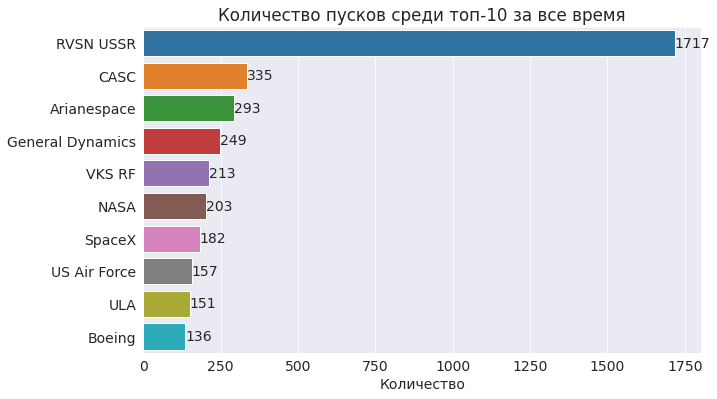

In [10]:
# Выделим топ-10
top_starts = companies.head(10)
# Посмотрим на него
display(top_starts)
# Расчет и вывод общего числа запусков
display('Общее число запусков', top_starts['count'].sum())

# Визуализация
# Настройки графика
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = '14'

# Функция для подписей данных на графике (stackoverflow)
def autolabel(rects, labels=None):
    for i, rect in enumerate(rects):
        width = rect.get_width()
        # Если есть параметр, для подписи бара, то пробует его вывести
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        # Если данные нечем подписывать, то выводится ширина текущего бара
        else:
            label = '%d' % int(width)
        ax.text(width, rect.get_y() + rect.get_height()/2,
                '{}'.format(label),
                va='center')

# Отрисовка
sns.barplot(data=top_starts, x='count', y='company')
# Сохранение параметров осей
ax = plt.gca()
# Применение функции
autolabel(ax.patches)
# Вывод наименований графика и осей
plt.title('Количество пусков среди топ-10 за все время')
plt.xlabel('Количество')
plt.ylabel('')
plt.show()

Явным лидером по запускам является RVSN USSR, у которого в 5 раз больше запусков, чем у второй позиции CASC, после спад количества пусков более плавный.
К тому же этому топу суммарно принадлежит почти 80% всех запусков из датасета.

Несмотря на большое количество пусков интресно было бы посмотреть на процент выполнения миссий нашего топа.

,company,count,success,%_success
0,ULA,151,150,99.34%
1,Boeing,136,131,96.32%
2,Arianespace,293,282,96.25%
3,SpaceX,182,172,94.51%
4,CASC,335,316,94.33%
5,VKS RF,213,199,93.43%
6,NASA,203,186,91.63%
7,RVSN USSR,1717,1564,91.09%
8,US Air Force,157,129,82.17%
9,General Dynamics,249,203,81.53%


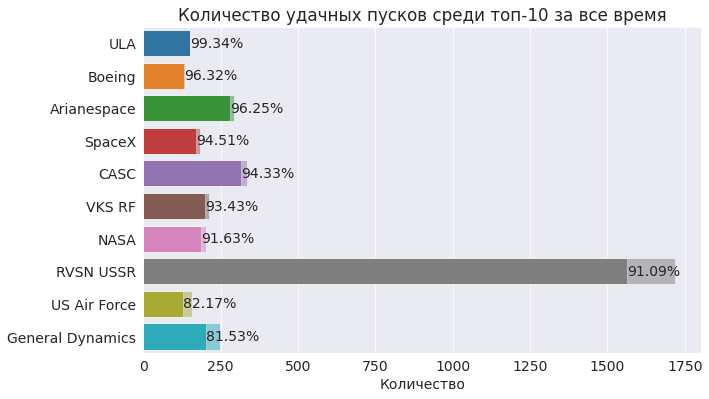

In [11]:
# Выделим удачные запуски
success_starts = space[space['mission_status'] == 'Success'].groupby('company', as_index=False)['date'].count().rename(columns={'date': 'success'}).sort_values('success', ascending=False)
# Объединим таблицы
top_starts = top_starts.merge(success_starts, on='company')
# Расчет процентов
top_starts['%_success'] = (top_starts.apply(lambda x: x['success'] / x['count'], axis=1)).apply('{:.2%}'.format)
# Сортируем по убыванию и обновляем индексы
top_starts.sort_values('%_success', ascending=False, inplace=True)
top_starts.reset_index(drop=True, inplace=True)
# Результат
display(top_starts)

# Визуализация     
# Настройки графика
plt.figure(figsize=(10,6))
# отрисовка 2х графиков (для наглядности)
sns.barplot(top_starts['success'], top_starts['company'])
sns.barplot(top_starts['count'], top_starts['company'], alpha=0.5)
# Вывод наименований графика и осей
plt.title('Количество удачных пусков среди топ-10 за все время')
plt.xlabel('Количество')
plt.ylabel('')
# Сохранение параметров осей
ax = plt.gca()
# Применение функции
autolabel(ax.patches,top_starts['%_success'])
plt.show()

А вот по успешности выполнения миссий другая картина: на первом месте оказался ULA c почти 100% успехами, далее идут Boeing и Arianespace, с небольшой разницей, а лидер по запускам RVSN USSR попал на 8 позицию. В целом можно сказать, что для большинства представителей топа процент удачных миссий более 90%, исключения составляют US Air Force и General Dynamics, у которых процент успешных запусков 82 и 81 соответственно.

**Выводы**

В представленном датасете есть информация о 61 компании, занимающимися полетами в космос, среди них можно выделить топ-10 компаний, которые выполнили больше всего запусков в течении всего времени. Лидером среди количества запусков является RVSN USSR, а компанией с наибольшим числом успешных миссий ULA.

### 3.2. Исследование дат запусков

При исследовании дат пусков, интереснее всего было бы посмотреть на распределение пусков по годам, для этого создадим отдельную колонку, в которой будем хранить года.

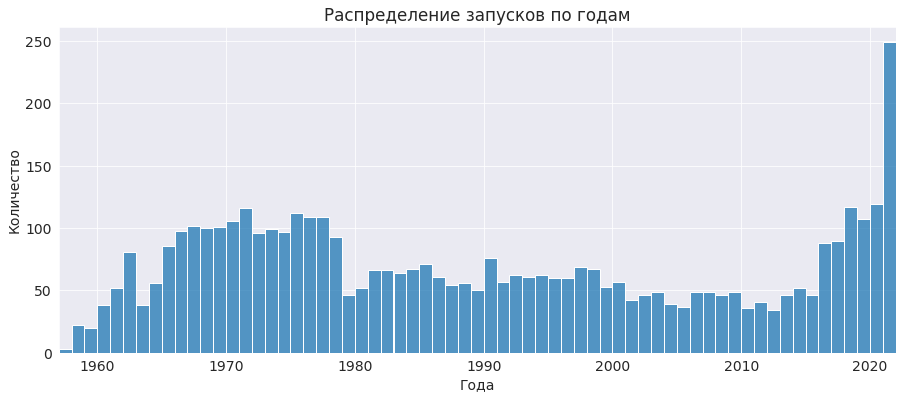

In [12]:
# Добавление колонки с годами
space['year'] = space['date'].dt.year
# Визуализация распределения
plt.figure(figsize=(15,6))
sns.histplot(data=space, x='year', binwidth=1)
plt.title('Распределение запусков по годам')
plt.xlabel('Года')
plt.ylabel('Количество')
plt.xlim([space['year'].min(), space['year'].max()])
plt.show()

При рассмотрении графика можно сказать, что с 1957 года и до середины 1970х количество запусков росло, далее до 2010 идет спад, а затем резкий скачок, особенно много запусков в 2021-2022 года, даже больше, чем в 1970е. Интересно было бы рассмотреть компании, которые проводили запуски с 2010. В рассматриваемый период могут попасть как новички так и старички, которые сделали пару пусков за весь период с 2010 года, их я бы не стал учитывать, чтобы почистить данные можно учитывать комппании, которые сделали не меньше пусков, чем среднее число за период с 2010 по 2022.

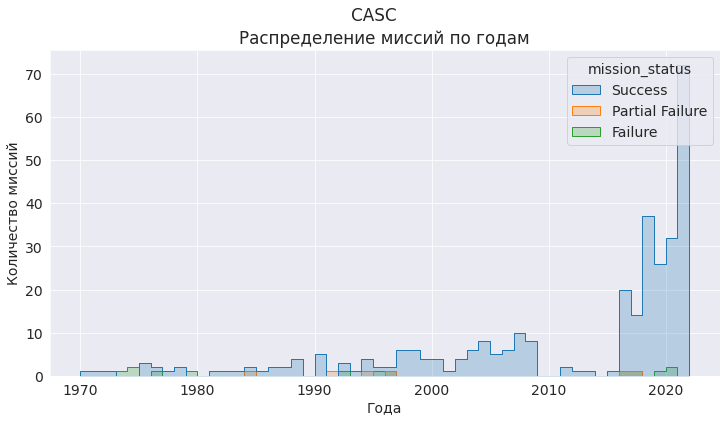

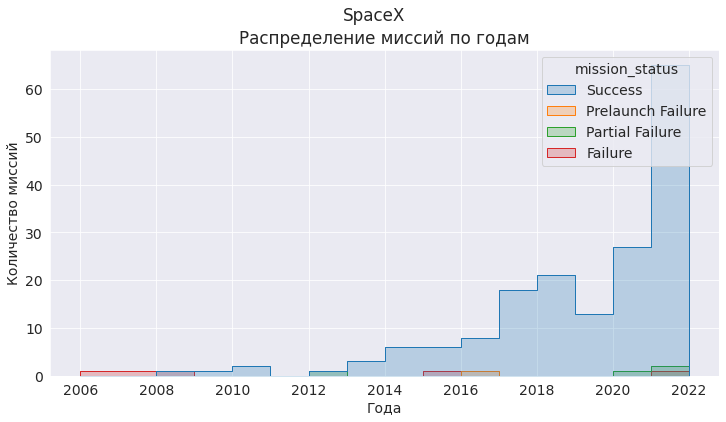

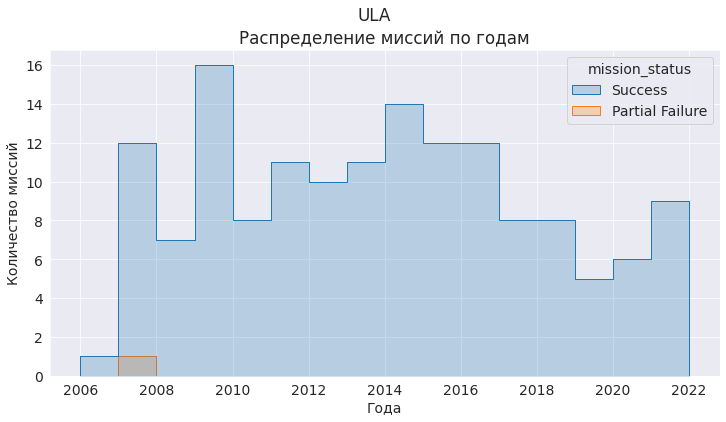

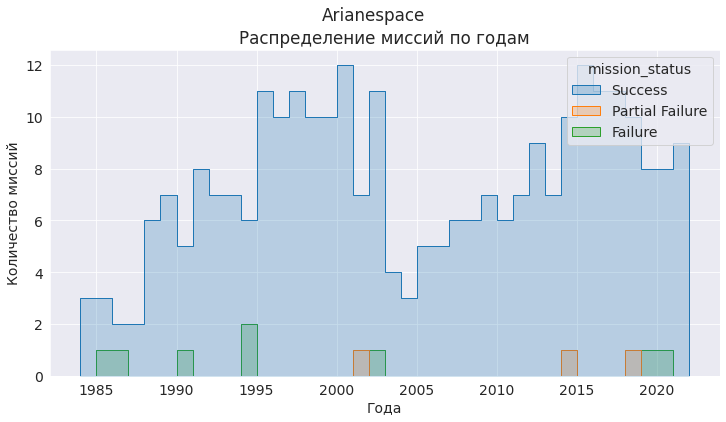

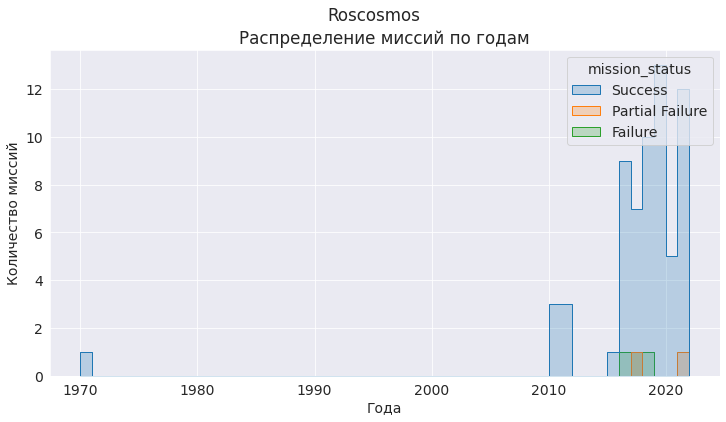

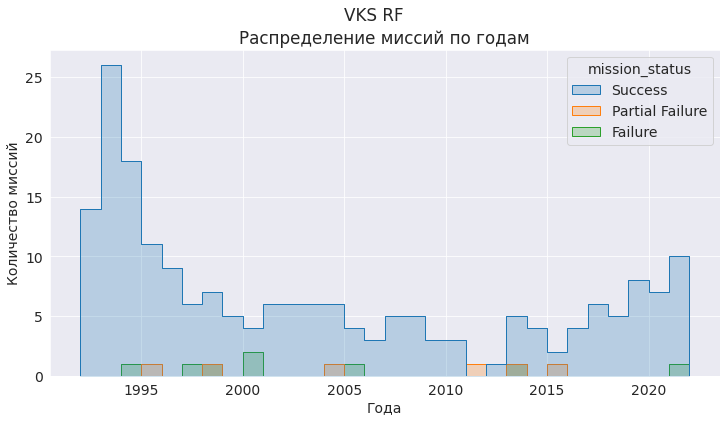

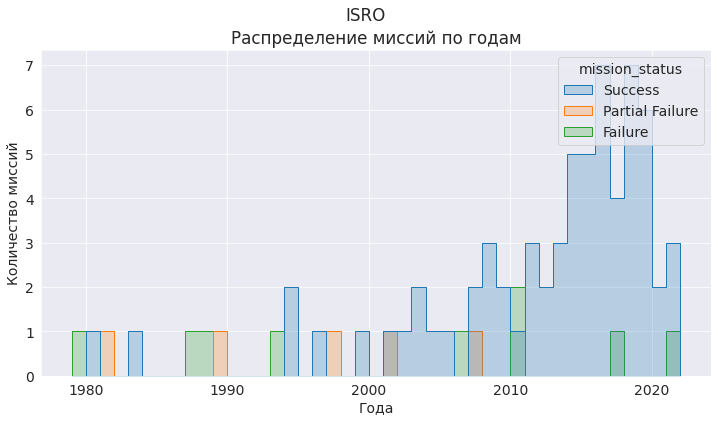

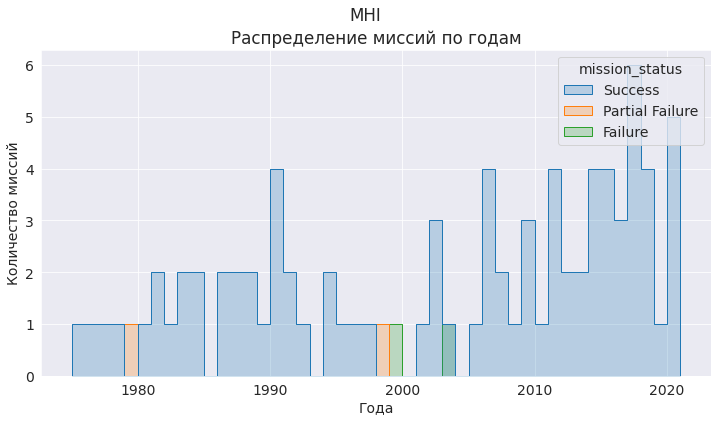

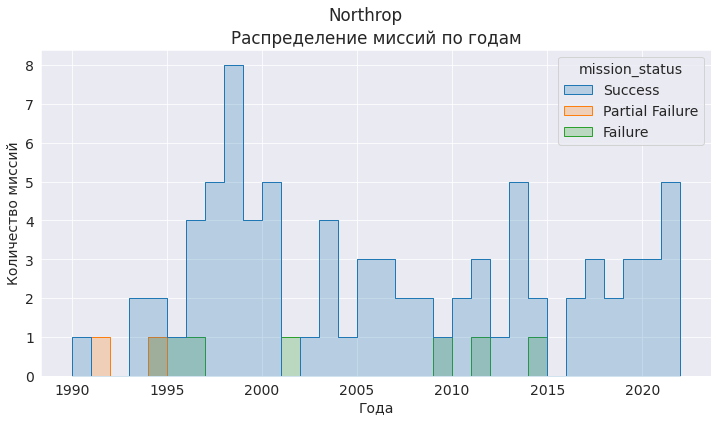

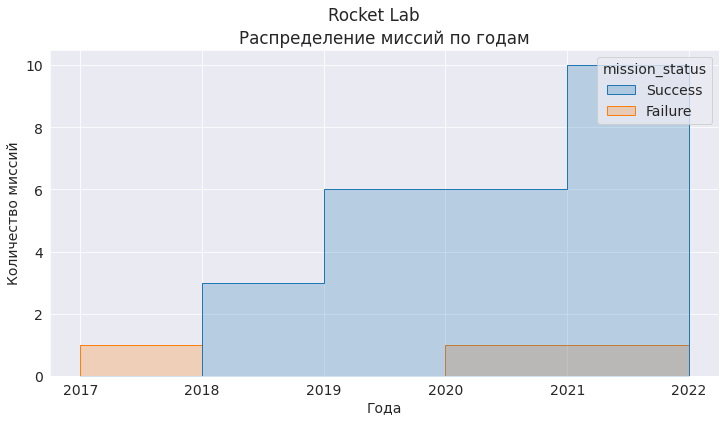

In [13]:
# Расчет среднего
mean_start = (space.query('year >=2010')).groupby('company')['mission'].count().mean()
# Найдем актуальные компании
actual_comp = (
    space.query('year >=2010')
    .groupby('company', as_index=False)['mission']
    .count()
    .rename(columns={'mission': 'count'})
    .sort_values('count', ascending=False)
    .query('count >= @mean_start')
    .reset_index(drop=True)
)
# Результат
actual_comp

# Строим графики с помощью цикла
for company in actual_comp['company'].unique():
  plt.figure(figsize=(12, 6))
  sns.histplot(data=space.query('company == @company').sort_values('mission_status', ascending=False), x='year', binwidth=1, element='step', hue='mission_status') 
  plt.ylabel('Количество миссий')
  plt.xlabel('Года')
  plt.title("Распределение миссий по годам")
  plt.suptitle(company)
  plt.show()

При помощи такой сортировки получилось выделить 10 основных компаний. С помощью графиков можно отметить, что есть компании, которые стали проявлять большую активность в 2020-2022 годах, к ним относятся: Roscosmos, ISRO, Rocket Lab, а также два "гиганта" SpaceX и CASC, которые провели более 70 запусков за последний год. Я бы подробнее сравнил 2х лидеров SpaceX и CASC, при чем интереснее всего рассматривать промежуток с 2010 года, т.к. ранее мало пусков по графикам.

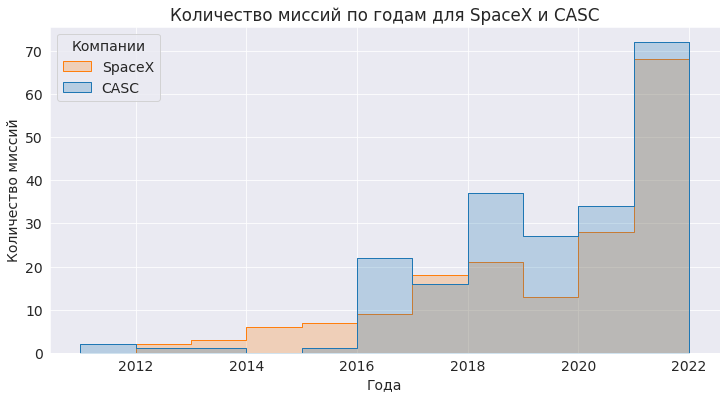

In [14]:
# Строим графики 
plt.figure(figsize=(12, 6))
sns.histplot(data = space.query('(company == "CASC" or company == "SpaceX") and year > 2010').sort_values('mission_status', ascending=False),
             x='year', 
             binwidth=1, 
             element='step', 
             hue='company', 
             legend=False
             )
plt.legend(title='Компании', loc='upper left', labels=['SpaceX', 'CASC'])
plt.ylabel('Количество миссий')
plt.xlabel('Года')
plt.title("Количество миссий по годам для SpaceX и CASC")

plt.show()

Можно сказать, что SpaceX чуть  быстрее начала наращивать количество пусков, а CASC совершила прыжок в 2016.<br>
В пункте 3.1. мы нашли топ-10 компаний по запускам. Теперь можем посмотреть на распределение запусков по годам в этих компаниях.

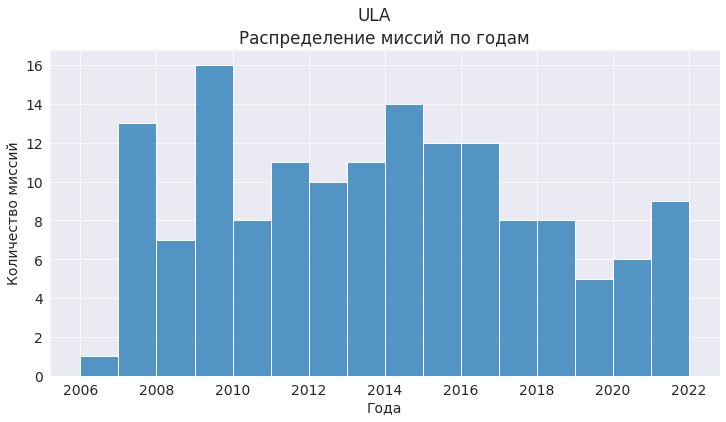

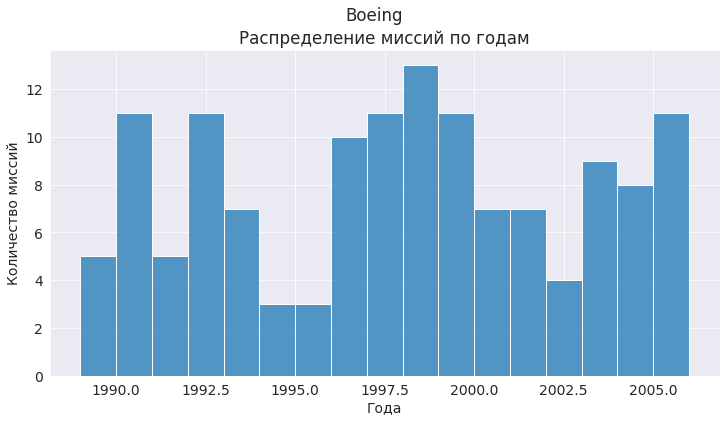

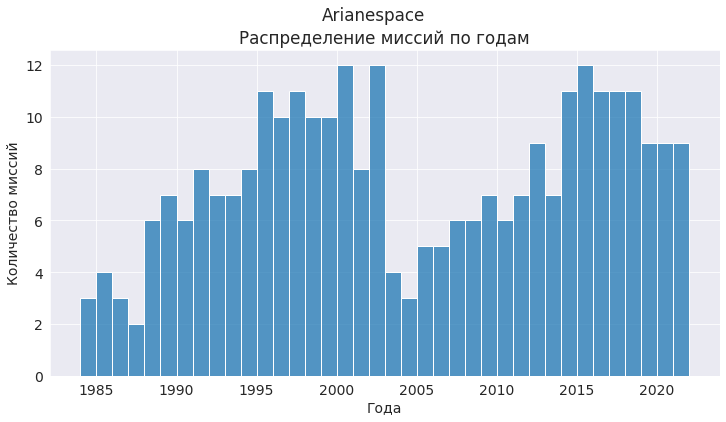

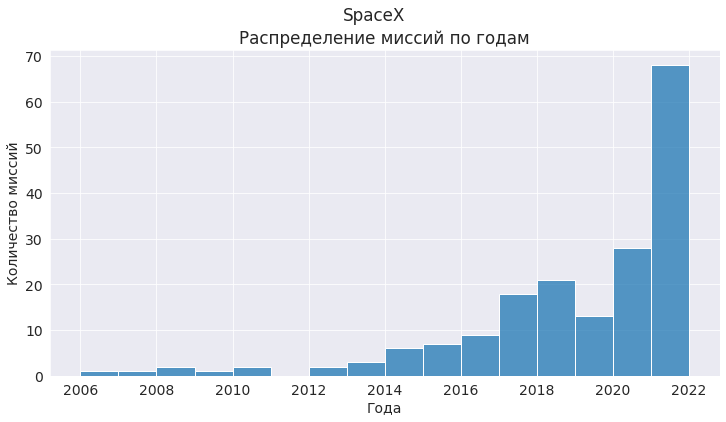

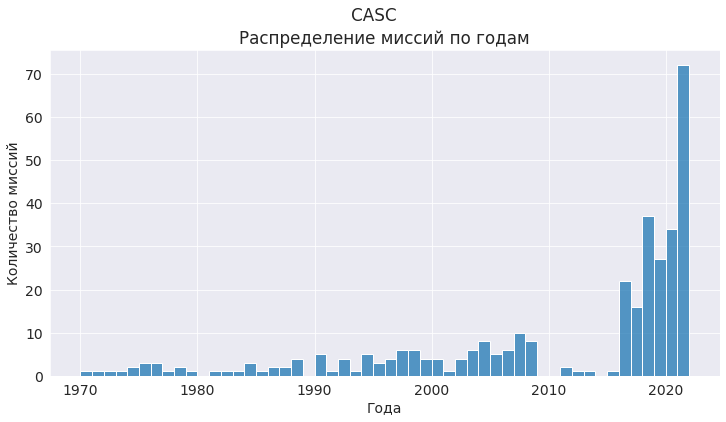

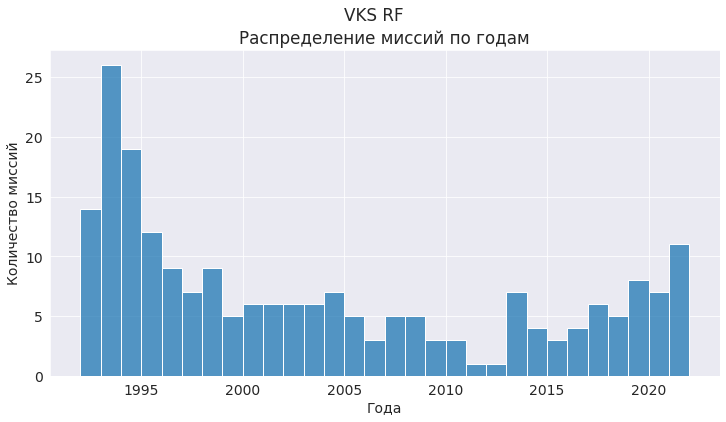

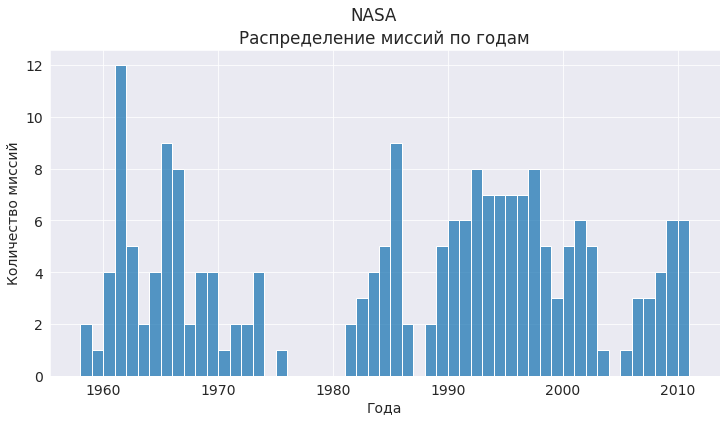

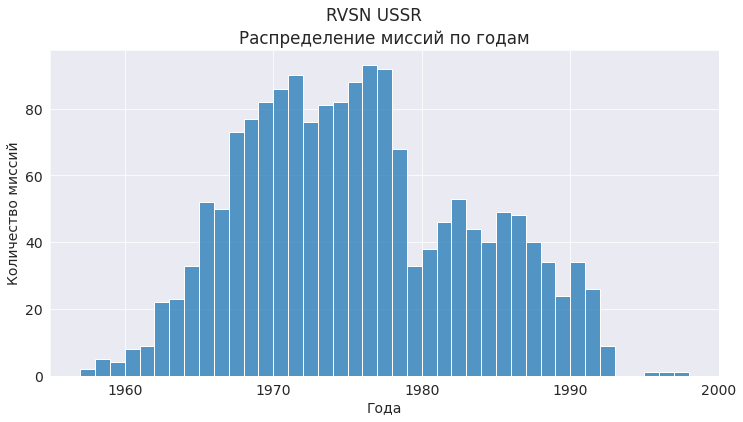

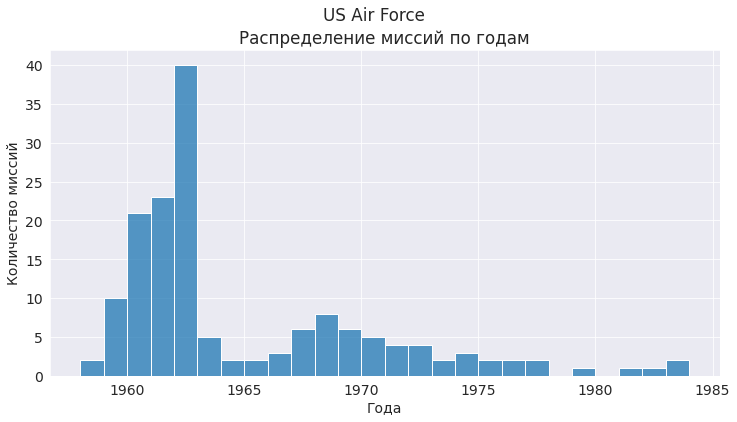

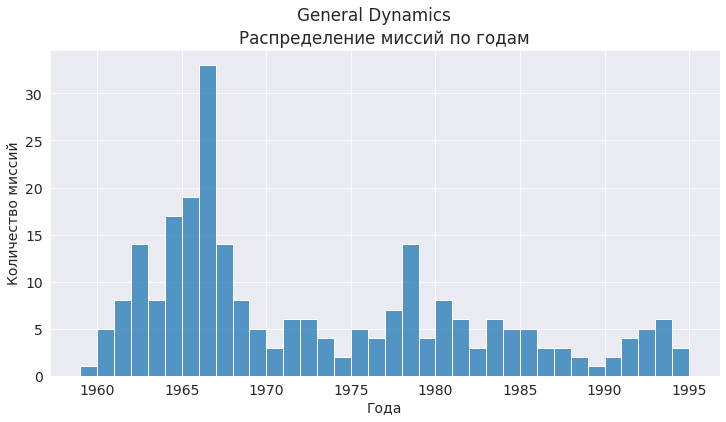

In [15]:
# Строим графики с помощью цикла
for company in top_starts['company'].unique():
  plt.figure(figsize=(12, 6))
  sns.histplot(data=space.query('company == @company'), x='year', binwidth=1) 
  plt.ylabel('Количество миссий')
  plt.xlabel('Года')
  plt.title("Распределение миссий по годам")
  plt.suptitle(company)
  plt.show()

**Выводы**

В целом графики просто отображают количество запусков разных компаний, можно описать их следующим образом:
1. ULA - ведет деятельность с 2006 года и до сих пор проводит запуски, при этом пик запусков приходится на 2014-2015, далее идет спад к 2020 и к 2022 опять подъем.
2. Boeing - запуски проводились волнообразно, с конца 1980х было множество запусков до 1995, далее скачок до пика 1998и снова спад к 2002 и последний скачок к 2006 году, далее о запусках нет информации, возможно она приотстановила свою деятельность в этом направлении.
3. Arianespace - начала деятельность с 1980х пики запусков приходятся на 1997 и 2015, запуски проводятся и по сей день.
4. SpaceX - существует с 2006 года, но резкий рост начинается примерно с 2014 года и до сих пор количество запусков только растет.
5. CASC - с 1970х по 2010 был планомерный рост, с 2010 по 2015 спад, далее резкий скачок количества запусков, вплоть до текущего времени
6. VKS RF - основной пик запусков в 1980х года, далее планомерное падение
7. NASA - пики запусков в 1960х и 1990х, далее следуеь спад после 2000 и скачок к 2010, но после данных нет
8. RVSN USSR - лидер по количества запусков, которые планомерно росли с начала 1960х до пика в 1970х, далее спад до завершения деятельности.
9. US Air Force - пик запусков был в начале 1960х годов, далее резкий спад и остановка пусков к середине 1980х.
10. General Dynamics - пик запусков приходится на вторую половину 1960х далее идет падение и в середине 1995 запуски прекращаются.

Компании из топа можно разделить на 3 группы:
1. Завершившие пуски - Boeing, NASA, RVSN USSR, US Air Force, General Dynamics.
2. Проводишие пуски с прошлого столетия и до сих пор - Arianespace, CASC, VKS RF.
3. Молодые компании появившиеся в текущем столетии - SpaceX и ULA. 

### 3.3 Исследование пусковых площадок

Для начала попробуем выделить страну из колонки `location`.

In [16]:
# Создадим отдельную колонку, в которой будем хранить страну 
space['place'] = space.apply(lambda x: x['location'].split(', ')[-1], axis=1)
# Вывод результата
space['place'].unique()

array(['Kazakhstan', 'USA', 'Russia', 'France', 'Kenya', 'Australia',
       'Japan', 'China', 'India', 'Gran Canaria', 'Barents Sea',
       'North Korea', 'Brazil', 'Pacific Ocean', 'South Korea', 'Israel',
       'New Zealand', 'New Mexico', 'Iran', 'Yellow Sea',
       'Shahrud Missile Test Site'], dtype=object)

По большей части удалось выделить страны, где производились запуски, теперь можно сгруппировать данные по странам и добавить колонку с процентом запусков.

In [17]:
# Рассчет количества пусков в разных странах
places = space.groupby('place', as_index=False)['mission'].count().rename(columns={'mission':'count'}).sort_values('count',ascending=False).reset_index(drop=True)
# Пересчет в проценты
places['%'] = places['count'] / places['count'].sum() * 100
# Вывод результата
places

,place,count,%
0,USA,1444,32.074633
1,Russia,1372,30.475344
2,Kazakhstan,697,15.482008
3,China,360,7.996446
4,France,318,7.063527
5,Japan,126,2.798756
6,India,81,1.799200
7,Pacific Ocean,32,0.710795
8,New Zealand,28,0.621946
9,Kenya,9,0.199911


В полученной таблице есть страны, которые совершили малое количество запусков, менее 5% от общего числа, такие страны можно объединить и назвать "Другие".

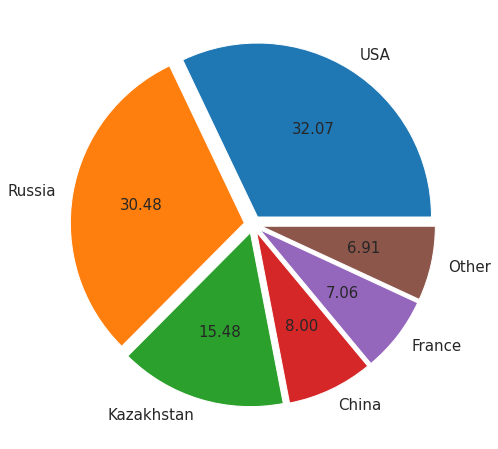

In [18]:
# Создание строки с "Другими" странами
other = {'place':'Other', 'count':places[places['%'] < 5]['count'].sum(), '%': places[places['%'] < 5]['%'].sum()}
# Выделяем тех, у кого более 5% запусков
places = places[places['%'] >= 5]
# Добавляем строку "Другие"
places = places.append(other, ignore_index=True)
# Построение графика
places.plot.pie(y='count',
                autopct="%.2f", 
                figsize=(8,8),
                explode=(0.05,0.05,0.05,0.05,0.05,0.05),  
                fontsize=15, 
                subplots=True, 
                labels=places['place'], 
                legend=False)
plt.ylabel('')
plt.show()

**Выводы**

Рассмотрели распределение запусков по странам, причем страны, которые совершили менее 5% от всех пусков объединили и создали категорию "Другие". На основе данных построили график распределения количества пуска по странам: лидирует США, затем идут Россия и Казахстан, последний факт говорит о том, что около трети пусков российских ракет производится в Казахстане.

### 3.4 Исследование ракет

Здесь мы можем подробнее рассмотреть модели ракет. Для начала посмотрим на количество моделей.

In [19]:
# Количество моделей
display('Количество моделей ракет', space['rocket'].nunique())

'Количество моделей ракет'

358

В датасете 358 моделей ракет. Можем рассмотреть статус каждой из моделей, списана или активна, а также рассмотреть какой компании принадлежит больше всего списанных моделей, а какой активных.<br>
Для начала рассмотрим статусы ракет.

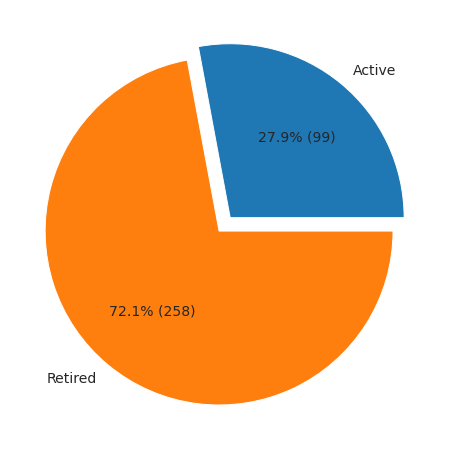

In [20]:
# Создаем таблицу со статусами и количеством
rock_status = space.groupby('rocket_status', as_index=False)['rocket'].nunique().rename(columns={'rocket': 'count'})
# Визуализация
# Функция для отображения и значения и процентов
def func(pct, allvals):
    absolute = int(pct/100.*allvals.sum())
    return "{:.1f}% ({:d})".format(pct, absolute)

rock_status.plot.pie(y='count',
                     autopct=lambda pct: func(pct, rock_status['count']),
                     figsize=(8,8),
                     explode=(0.05, 0.05),
                     labels=rock_status['rocket_status'],
                     legend=False
                     )
plt.ylabel('')
plt.show()

В итоге получили 99 активных ракет и 258 ракет, которые уже списаны. Теперь рассмотрим кому принадлежит больше всего списанных моделей, а кому активных.

In [21]:
# Создание таблицы с ракетами
retired_rock = space.query('rocket_status == "Retired"').groupby('company', as_index=False)['rocket'].nunique().sort_values('rocket', ascending=False).reset_index(drop=True).head(1)
active_rock = space.query('rocket_status == "Active"').groupby('company', as_index=False)['rocket'].nunique().sort_values('rocket', ascending=False).reset_index(drop=True).head(1)
# Вывод результата
display('Компания с максимальным числом списанных ракет', retired_rock)
print('')
display('Компания с максимальным числом активных ракет', active_rock)

'Компания с максимальным числом списанных ракет'

,company,rocket
0,RVSN USSR,37


'Компания с максимальным числом активных ракет'

,company,rocket
0,CASC,28


Больше всего списанных ракет у RVSN USSR, больше всего активных у CASC.

**Выводы**

По предоставленным данным на момент августа 2022 года списанными числятся 72% ракет, активны 28%, при этом больше всего списанных ракет у RVSN USSR, а активных у CASC. Интересно было бы посмотреть процесс списывание с течением времени, но к сожалению с помощью этих данных это выполнить нельзя.

### 3.5 Исследование цен

Для исследования цен стоит удалить те ракеты, цены которых не указаны.

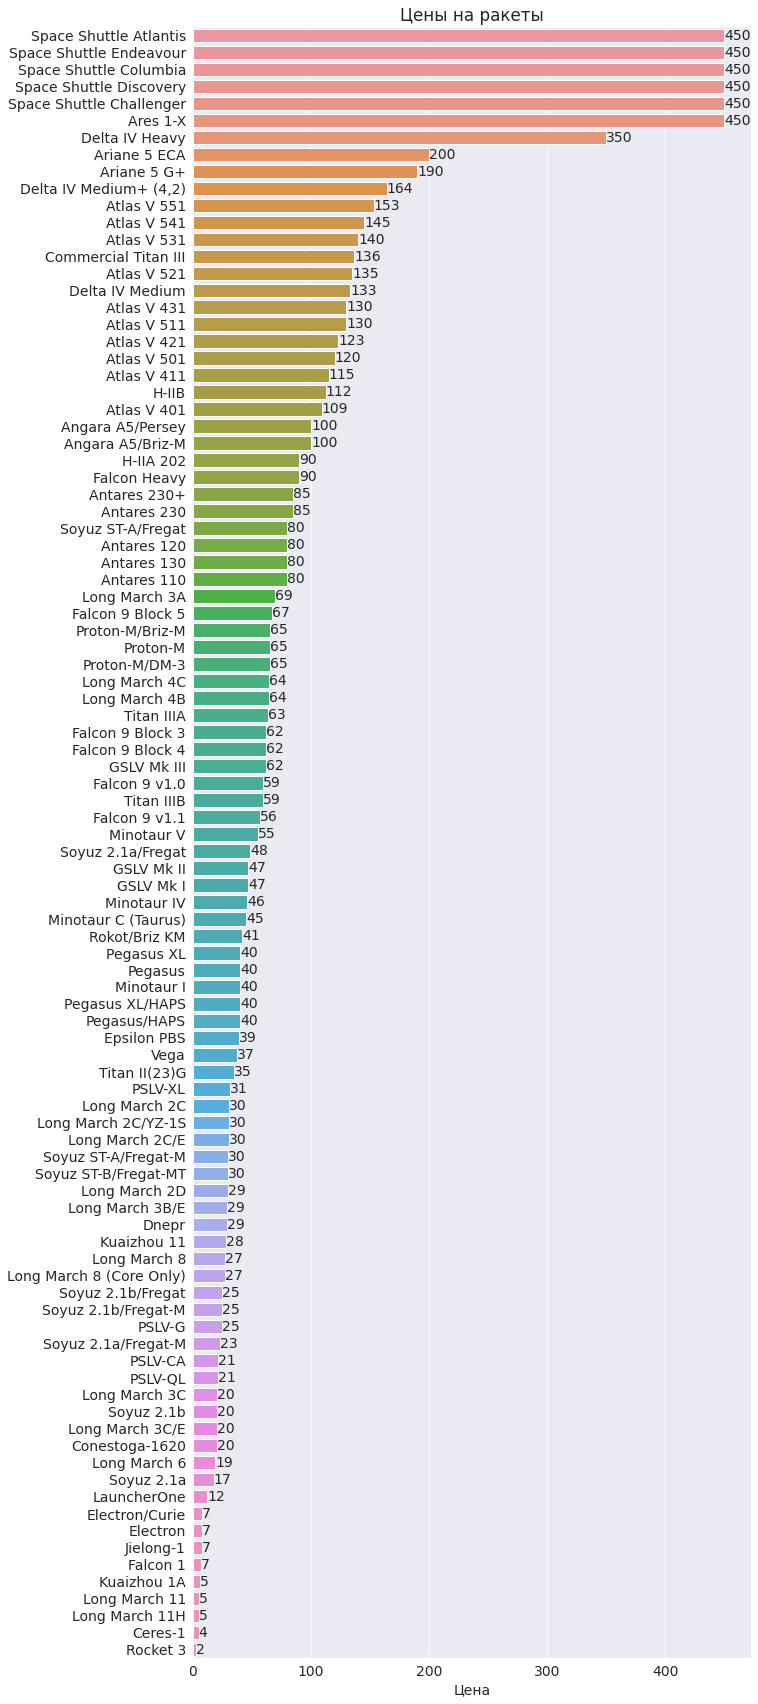

In [22]:
# Создали таблицу, в которой храняться ракеты, на которые есть цены
rocket_price = space.dropna(subset=['price']).reset_index(drop=True).sort_values('price',ascending=False).reset_index(drop=True)

# Визуализация
plt.figure(figsize=(10,30))
sns.barplot(data=rocket_price, x='price', y='rocket')
ax = plt.gca()
autolabel(ax.patches)
plt.title('Цены на ракеты')
plt.xlabel('Цена')
plt.ylabel('')
plt.show()

**Выводы**

Самыми дорогими являются космические шаттлы, со стоимостью 450 млн. долларов каждый.

## 4.Общие выводы

1. В представленном датасете есть информация о 61 компании, занимающимися полетами в космос, среди них можно выделить топ-10 компаний, которые выполнили больше всего запусков в течении всего времени. Лидером среди количества запусков является RVSN USSR, а компанией с наибольшим числом успешных миссий ULA.
2. Компании из топа можно разделить на 3 группы:
  1. Завершившие пуски - Boeing, NASA, RVSN USSR, US Air Force, General Dynamics.
  2. Проводишие пуски с прошлого столетия и до сих пор - Arianespace, CASC, VKS RF.
  3. Молодые компании появившиеся в текущем столетии - SpaceX и ULA. 
3. Рассмотрели распределение запусков по странам, причем страны, которые совершили менее 5% от всех пусков объединили и создали категорию "Другие". На основе данных построили график распределения количества пуска по странам: лидирует США, затем идут Россия и Казахстан, последний факт говорит о том, что около трети пусков российских ракет производится в Казахстане.
4. В итоге получили 99 активных ракет и 258 ракет, которые уже списаны. Теперь рассмотрим кому принадлежит больше всего списанных моделей, а кому активных.
5. Самыми дорогими являются космические шаттлы, со стоимостью 450 млн. долларов каждый.

P.S. В качестве дополнительных исследований можно посмотреть на распределение цен на ракеты по годам, а также рассмотреть как списывались ракеты с течением времени.